In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('e-commerce.csv', encoding='ISO-8859-1')


In [9]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000

In [10]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [13]:
df['Description'].fillna('Unknown', inplace=True)
df['CustomerID'].fillna(-1, inplace=True)

In [15]:
df['Year'] = df['InvoiceDate'].dt.to_period('Y')
yearly_sales = df.groupby('Year')['Quantity'].sum()


In [16]:
print(yearly_sales)

Year
2010     342228
2011    4834222
Freq: A-DEC, Name: Quantity, dtype: int64


In [20]:
# Group by Country and calculate the total quantity sold per country
country_sales = df.groupby('Country')['Quantity'].sum()

# Sort the countries by total quantity in descending order
sorted_country_sales = country_sales.sort_values(ascending=False)

# Get the top 5 countries
top_5_countries = sorted_country_sales.head(5)

print(top_5_countries)


Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Name: Quantity, dtype: int64


In [21]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


In [22]:
print(top_products)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


<bound method _AxesBase.set_xlabel of <Axes: title={'center': 'Top 10 Best-Selling Products'}>>

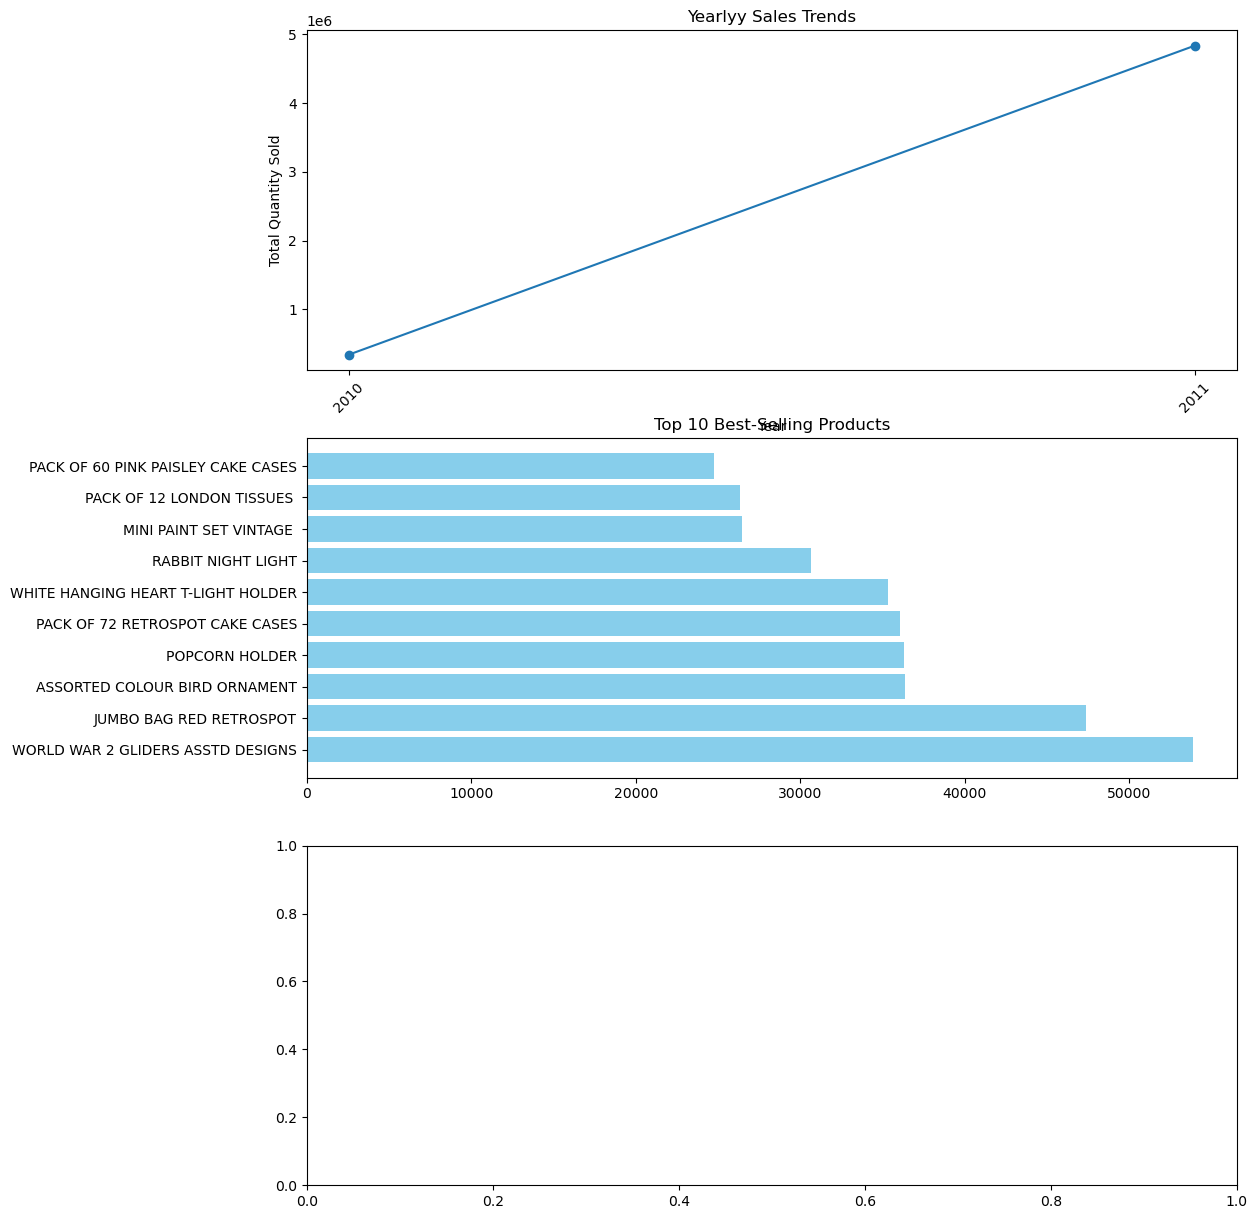

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plot 1: Sales trends over time
axes[0].plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
axes[0].set_title('Yearly Sales Trends')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Quantity Sold')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Top selling products
axes[1].barh(top_products.index, top_products.values, color='skyblue')
axes[1].set_title('Top 10 Best-Selling Products')
axes[1].set_xlabel

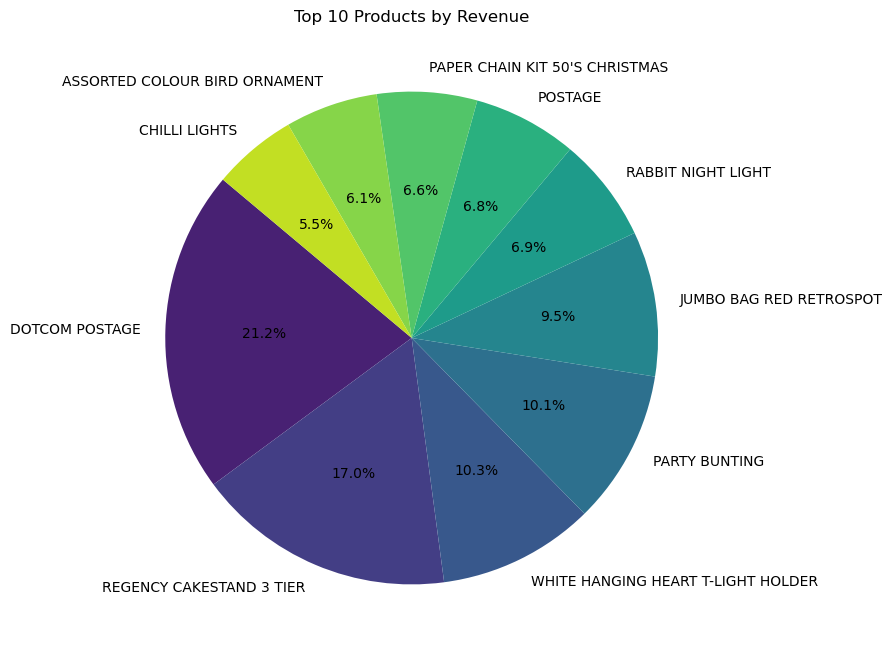

In [28]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_revenue_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)


# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(top_revenue_products.values, labels=top_revenue_products.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Top 10 Products by Revenue')
plt.show()


In [29]:
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()
# You can segment customers by setting thresholds or using clustering.


In [30]:
print(customer_spending)

CustomerID
-1.0        1447682.12
 12346.0          0.00
 12347.0       4310.00
 12348.0       1797.24
 12349.0       1757.55
               ...    
 18280.0        180.60
 18281.0         80.82
 18282.0        176.60
 18283.0       2094.88
 18287.0       1837.28
Name: TotalPrice, Length: 4373, dtype: float64


Country
United Kingdom    3951
Germany             95
France              88
Spain               31
Belgium             25
Switzerland         22
Portugal            20
Italy               15
Finland             12
Austria             11
Name: CustomerID, dtype: int64


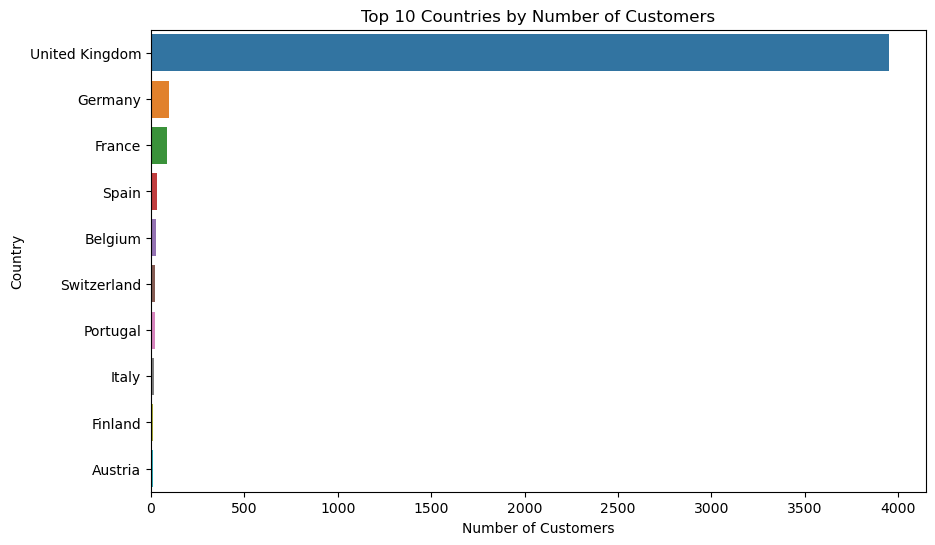

In [43]:
customer_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print(customer_country.head(10))

customer_country=customer_country.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_country.values, y=customer_country.index)
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Customers')
plt.show()

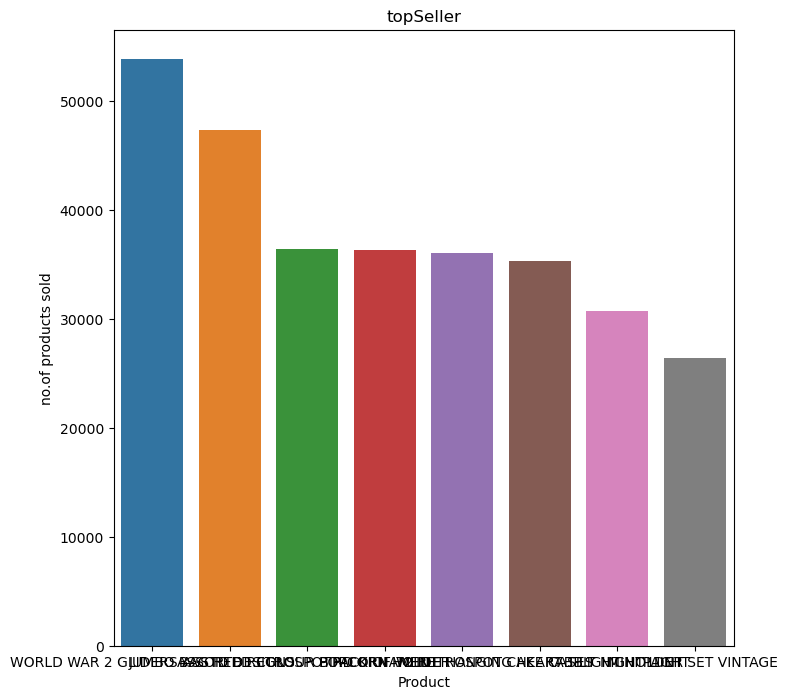

In [51]:
top_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False)
top_Product = top_product.head(8)

plt.figure(figsize=(8,8))
sns.barplot(x=top_Product.index, y= top_Product.values)
plt.xlabel('Product')
plt.ylabel('no.of products sold')
plt.title('topSeller')
plt.show()